In [58]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
# Mostrar todas las columnas sin límite
pd.set_option('display.max_columns', None)

In [39]:
# Leer el archivo CSV
productos_df = pd.read_csv('productos.zip', sep='|')

productos_df.head()

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_53614/2831869706.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  productos_df = pd.read_csv('productos.zip', sep='|')


,id_comercio,id_bandera,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2
0,10,1.0,63.0,7.790771e+12,1.0,TOALLA NOSOTRAS CLASICAS C CALENDULA X 16U,1.0,UNI,NOSOTRAS,2809.0,175.56,16.0,UNI,NaN,NaN,NaN,NaN
1,10,3.0,711.0,7.790070e+12,1.0,FIDEOS DEDALITOS LUCCHETTI BOLSA X 500 GRS,1.0,UNI,LUCCHETTI,1339.0,2678.00,500.0,GRM,NaN,NaN,NaN,NaN
2,10,1.0,44.0,7.622202e+12,1.0,GALLETITAS BOCA DE DAMA TERRABUSI X 170 GRS,1.0,UNI,TERRABUSI,959.0,5641.18,170.0,GRM,NaN,NaN,NaN,NaN
3,10,2.0,62.0,7.791293e+12,1.0,ACONDICIONADOR LISO EFECTO BOTOX TRESEMME X 25...,1.0,UNI,TRESEMME,3969.0,15876.00,250.0,CM3,NaN,NaN,NaN,NaN
4,10,1.0,2.0,7.791720e+12,1.0,ANANA EN RODAJAS BULNEZ LATA X 825 GRS,1.0,UNI,BULNEZ,2990.0,3624.24,825.0,GRM,NaN,NaN,NaN,NaN


Analizamos los tipos de datos de las columnas.

In [40]:
productos_df.dtypes

id_comercio                              object
id_bandera                              float64
id_sucursal                             float64
id_producto                             float64
productos_ean                           float64
productos_descripcion                    object
productos_cantidad_presentacion         float64
productos_unidad_medida_presentacion     object
productos_marca                          object
productos_precio_lista                  float64
productos_precio_referencia             float64
productos_cantidad_referencia           float64
productos_unidad_medida_referencia       object
productos_precio_unitario_promo1        float64
productos_leyenda_promo1                 object
productos_precio_unitario_promo2        float64
productos_leyenda_promo2                float64
dtype: object

In [41]:
productos_df.describe()

,id_bandera,id_sucursal,id_producto,productos_ean,productos_cantidad_presentacion,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_precio_unitario_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2
count,2.232853e+06,2.232853e+06,2.232853e+06,2.232853e+06,2232853.0,2.232853e+06,2.232853e+06,2.232853e+06,6.870200e+04,0.0,0.0
mean,2.065017e+00,3.166739e+02,7.322620e+12,9.777025e-01,1.0,1.050002e+04,2.112866e+04,3.965329e+02,6.686930e+04,NaN,NaN
std,8.728486e-01,2.318601e+02,1.653917e+12,1.476493e-01,0.0,8.212710e+04,9.270248e+04,5.130412e+02,2.463596e+05,NaN,NaN
min,1.000000e+00,1.000000e+00,4.008140e+07,0.000000e+00,1.0,3.600000e+01,2.700000e-01,0.000000e+00,4.500000e+01,NaN,NaN
25%,1.000000e+00,1.370000e+02,7.790315e+12,1.000000e+00,1.0,1.619000e+03,3.610000e+03,8.500000e+01,1.290000e+03,NaN,NaN
50%,2.000000e+00,2.560000e+02,7.791720e+12,1.000000e+00,1.0,2.790000e+03,8.350000e+03,2.370000e+02,1.990000e+03,NaN,NaN
75%,3.000000e+00,4.960000e+02,7.794521e+12,1.000000e+00,1.0,5.099000e+03,1.695000e+04,5.000000e+02,4.500000e+03,NaN,NaN
max,3.000000e+00,8.100000e+02,9.002490e+12,1.000000e+00,1.0,7.349000e+06,7.349000e+06,8.000000e+03,6.849000e+06,NaN,NaN


In [42]:
productos_df.tail()

,id_comercio,id_bandera,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2
2232849,10,2.0,512.0,2.509067e+12,0.0,QUESO CREMOSO FRACC SILVIA,1.0,KGM,S/D,14359.0,14359.0,1000.0,GRM,790.0,Promo A valida desde el 02/05/2025 hasta 04/05...,NaN,NaN
2232850,10,3.0,736.0,7.790010e+12,1.0,ACOND HIDRATACION INTENSA JOHNSONS KIDS X 200 CC,1.0,UNI,JOHNSONS BABY,4965.0,24825.0,200.0,CM3,2310.0,Promo A valida desde el 17/04/2025 hasta 20/05...,NaN,NaN
2232851,10,3.0,748.0,7.730908e+12,1.0,JUGO EN POLVO MIX FRUTAL RINDE DOS X 13GRS,1.0,UNI,RINDE DOS,559.0,4300.0,13.0,GRS,NaN,NaN,NaN,NaN
2232852,10,3.0,450.0,7.790070e+12,1.0,FIDEOS INTEGRALES SPAGHETTI MATARAZZO X 500 GRS,1.0,UNI,MATARAZZO,2009.0,4018.0,500.0,GRM,NaN,NaN,NaN,NaN
2232853,Ultima actualización: 2025-05-02T05:00:43-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notamos que el último registro de cada csv es irrelevante.

In [43]:
productos_df = productos_df.drop(productos_df.index[-1])

Análisis de nulos.

In [44]:
productos_df.isnull().sum()

id_comercio                                   0
id_bandera                                    0
id_sucursal                                   0
id_producto                                   0
productos_ean                                 0
productos_descripcion                         0
productos_cantidad_presentacion               0
productos_unidad_medida_presentacion          0
productos_marca                               0
productos_precio_lista                        0
productos_precio_referencia                   0
productos_cantidad_referencia                 0
productos_unidad_medida_referencia            0
productos_precio_unitario_promo1        2164151
productos_leyenda_promo1                2164151
productos_precio_unitario_promo2        2232853
productos_leyenda_promo2                2232853
dtype: int64

In [45]:
len(productos_df)

2232853

In [46]:
productos_df.columns

Index(['id_comercio', 'id_bandera', 'id_sucursal', 'id_producto',
       'productos_ean', 'productos_descripcion',
       'productos_cantidad_presentacion',
       'productos_unidad_medida_presentacion', 'productos_marca',
       'productos_precio_lista', 'productos_precio_referencia',
       'productos_cantidad_referencia', 'productos_unidad_medida_referencia',
       'productos_precio_unitario_promo1', 'productos_leyenda_promo1',
       'productos_precio_unitario_promo2', 'productos_leyenda_promo2'],
      dtype='object')

Verificamos cuántos registros tienen el código de producto EAN y cuántos no.

In [47]:
productos_df['productos_ean'].value_counts()

productos_ean
1.0    2183066
0.0      49787
Name: count, dtype: int64

In [48]:

productos_df['productos_ean'].duplicated().sum()

np.int64(2232851)

Verificamos que no haya un id_producto repetido como EAN y como NO EAN.

In [49]:
mask = productos_df.groupby('id_producto')['productos_ean'].nunique() > 1

# Filtrar el DataFrame original con los valores que cumplen la condición
df_filtrado = productos_df[productos_df['id_producto'].isin(mask[mask].index)]
df_filtrado.head()

,id_comercio,id_bandera,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2


Determinamos las columnas de interés.

In [50]:
columnas_de_interes = [ 
       'id_sucursal',
       'id_producto',
       'productos_ean',
       'productos_descripcion',
       'productos_cantidad_presentacion',
       'productos_unidad_medida_presentacion',
       'productos_marca',
       'productos_precio_lista',
       'productos_precio_referencia',
       'productos_cantidad_referencia',
       'productos_unidad_medida_referencia',
       'productos_precio_unitario_promo1',
       'productos_leyenda_promo1',
       'productos_precio_unitario_promo2',
       'productos_leyenda_promo2'
]

In [51]:
productos_df = productos_df[columnas_de_interes]
productos_df.head()

,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2
0,63.0,7.790771e+12,1.0,TOALLA NOSOTRAS CLASICAS C CALENDULA X 16U,1.0,UNI,NOSOTRAS,2809.0,175.56,16.0,UNI,NaN,NaN,NaN,NaN
1,711.0,7.790070e+12,1.0,FIDEOS DEDALITOS LUCCHETTI BOLSA X 500 GRS,1.0,UNI,LUCCHETTI,1339.0,2678.00,500.0,GRM,NaN,NaN,NaN,NaN
2,44.0,7.622202e+12,1.0,GALLETITAS BOCA DE DAMA TERRABUSI X 170 GRS,1.0,UNI,TERRABUSI,959.0,5641.18,170.0,GRM,NaN,NaN,NaN,NaN
3,62.0,7.791293e+12,1.0,ACONDICIONADOR LISO EFECTO BOTOX TRESEMME X 25...,1.0,UNI,TRESEMME,3969.0,15876.00,250.0,CM3,NaN,NaN,NaN,NaN
4,2.0,7.791720e+12,1.0,ANANA EN RODAJAS BULNEZ LATA X 825 GRS,1.0,UNI,BULNEZ,2990.0,3624.24,825.0,GRM,NaN,NaN,NaN,NaN


In [ ]:
productos_df['id_sucursal'] = productos_df['id_sucursal'].astype(int)
productos_df['productos_ean'] = productos_df['productos_ean'].astype(int).astype(bool)
# Convertir la columna 'id_producto' a categórica
productos_df['id_producto'] = productos_df['id_producto'].astype(int).astype(str).astype('category')
productos_df['productos_unidad_medida_presentacion'] = productos_df['productos_unidad_medida_presentacion'].astype('category')
productos_df['productos_marca'] = productos_df['productos_marca'].astype('category')
productos_df['productos_unidad_medida_referencia'] = productos_df['productos_unidad_medida_referencia'].astype('category')

#  Normalizamos los precios agrupando por cada id_producto
scaler = StandardScaler()
productos_df['precio_zscore'] = productos_df.groupby('id_producto')['productos_precio_referencia'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)

# Mergear con sucursales
sucursales_df = pd.read_excel('./sucursales/sucursales_procesado.xlsx')
# Uno los dataframe por la columna de id_sucursal
productos_df = pd.merge(productos_df, sucursales_df, on='id_sucursal', how='inner')
display(productos_df.head())

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_53614/3451450940.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_df['precio_zscore'] = productos_df.groupby('id_producto')['productos_precio_referencia'].transform(


,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2,precio_zscore,id_comercio,id_bandera,sucursales_nombre,sucursales_tipo,sucursales_calle,sucursales_numero,sucursales_latitud,sucursales_longitud,sucursales_observaciones,sucursales_barrio,sucursales_codigo_postal,sucursales_localidad,sucursales_provincia,sucursales_lunes_horario_atencion,sucursales_martes_horario_atencion,sucursales_miercoles_horario_atencion,sucursales_jueves_horario_atencion,sucursales_viernes_horario_atencion,sucursales_sabado_horario_atencion,sucursales_domingo_horario_atencion,comercio_bandera_nombre
0,63,7790770601899,True,TOALLA NOSOTRAS CLASICAS C CALENDULA X 16U,1.0,UNI,NOSOTRAS,2809.0,175.56,16.0,UNI,NaN,NaN,NaN,NaN,1.432406e+00,10,1,Caleta Olivia,Hipermercado,Humberto Beghin,762.0,-46.444906,-67.533789,NaN,NaN,9011,Santa Cruz,Santa Cruz,09:00 a 20:00,09:00 a 20:00,09:00 a 20:00,09:00 a 20:00,09:00 a 20:00,09:00 a 20:00,09:00 a 20:00,Hipermercado Carrefour
1,711,7790070318398,True,FIDEOS DEDALITOS LUCCHETTI BOLSA X 500 GRS,1.0,UNI,LUCCHETTI,1339.0,2678.00,500.0,GRM,NaN,NaN,NaN,NaN,-2.610033e-01,10,3,Álvarez Thomas 372,Autoservicio,Av. Álvarez Thomas,372.0,-34.581280,-58.449050,NaN,Colegiales,1427,Ciudad Autónoma de Buenos Aires,CABA,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,11:00 a 20:00,Express
2,44,7622201808860,True,GALLETITAS BOCA DE DAMA TERRABUSI X 170 GRS,1.0,UNI,TERRABUSI,959.0,5641.18,170.0,GRM,NaN,NaN,NaN,NaN,-2.848947e+00,10,1,Resistencia II,Hipermercado,Av. Ávalos,NaN,-27.438800,-58.987383,y Lavalle,NaN,3500,Resistencia,Chaco,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,09:00 a 20:00,Hipermercado Carrefour
3,62,7791293050089,True,ACONDICIONADOR LISO EFECTO BOTOX TRESEMME X 25...,1.0,UNI,TRESEMME,3969.0,15876.00,250.0,CM3,NaN,NaN,NaN,NaN,-6.932130e-01,10,2,Champagnat,Hipermercado,Panamericana Ramal Pilar,NaN,-34.449813,-58.916319,Km 54,NaN,1629,Pilar,Buenos Aires,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,Market
4,2,7791720018088,True,ANANA EN RODAJAS BULNEZ LATA X 825 GRS,1.0,UNI,BULNEZ,2990.0,3624.24,825.0,GRM,NaN,NaN,NaN,NaN,1.364242e-12,10,1,Vicente López,Hipermercado,Av. del Libertador,215.0,-34.532302,-58.468176,NaN,NaN,1638,Vicente López,Buenos Aires,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,09:00 a 20:00,Hipermercado Carrefour


# **Corrección de desbalances**

Se plantea predecir el barrio de CABA al que pertenece un producto a partir de algunos de los features del dataset original.

In [59]:
# Función para calcular la entropía de Shannon
def shannon_entropy(y):
    probs = y.value_counts(normalize=True)
    return -np.sum(probs * np.log2(probs))

In [77]:
# Función para graficar la distribución de la variable target
def plot(y):
    fig, axes = plt.subplots(figsize=(40, 15))
    sns.countplot(x=y, hue=y, palette="Set2", ax=axes)
    
    axes.set_xlabel("Survived")
    axes.set_ylabel("Cantidad")
    axes.set_title(f"Distribución de la variable {target}")

    plt.tight_layout()
    plt.show()

In [61]:
# Evaluación del desbalance
def info(y):
    print("Proporción de clases:")
    print(y.value_counts(normalize=True))
    entropy = shannon_entropy(y)
    print("\nEntropía de Shannon:", entropy)
    plot(y)

In [84]:
productos_df_new = productos_df[
    (productos_df['sucursales_provincia'] == 'CABA')
]

Proporción de clases:
sucursales_barrio
Palermo             0.093419
Caballito           0.086349
Belgrano            0.078467
San Nicolas         0.075379
Recoleta            0.074136
Villa Urquiza       0.047507
Villa del Parque    0.047241
Almagro             0.039340
Boedo               0.032493
Villa Crespo        0.026718
Mataderos           0.023416
Monserrat           0.023175
Retiro              0.020520
Parque Patricios    0.020072
Floresta            0.019861
Flores              0.019572
Nuñez               0.018818
La Boca             0.018576
Santa Rita          0.018421
San Cristobal       0.015431
Congreso            0.015348
Balvanera           0.015154
Colegiales          0.014784
Liniers             0.014071
Chacarita           0.012164
Villa Luro          0.011770
Naon                0.011719
Once                0.011592
San telmo           0.011465
Saavedra            0.011420
Parque Chacabuco    0.008609
Barracas            0.008449
Lugano              0.008365
Vil

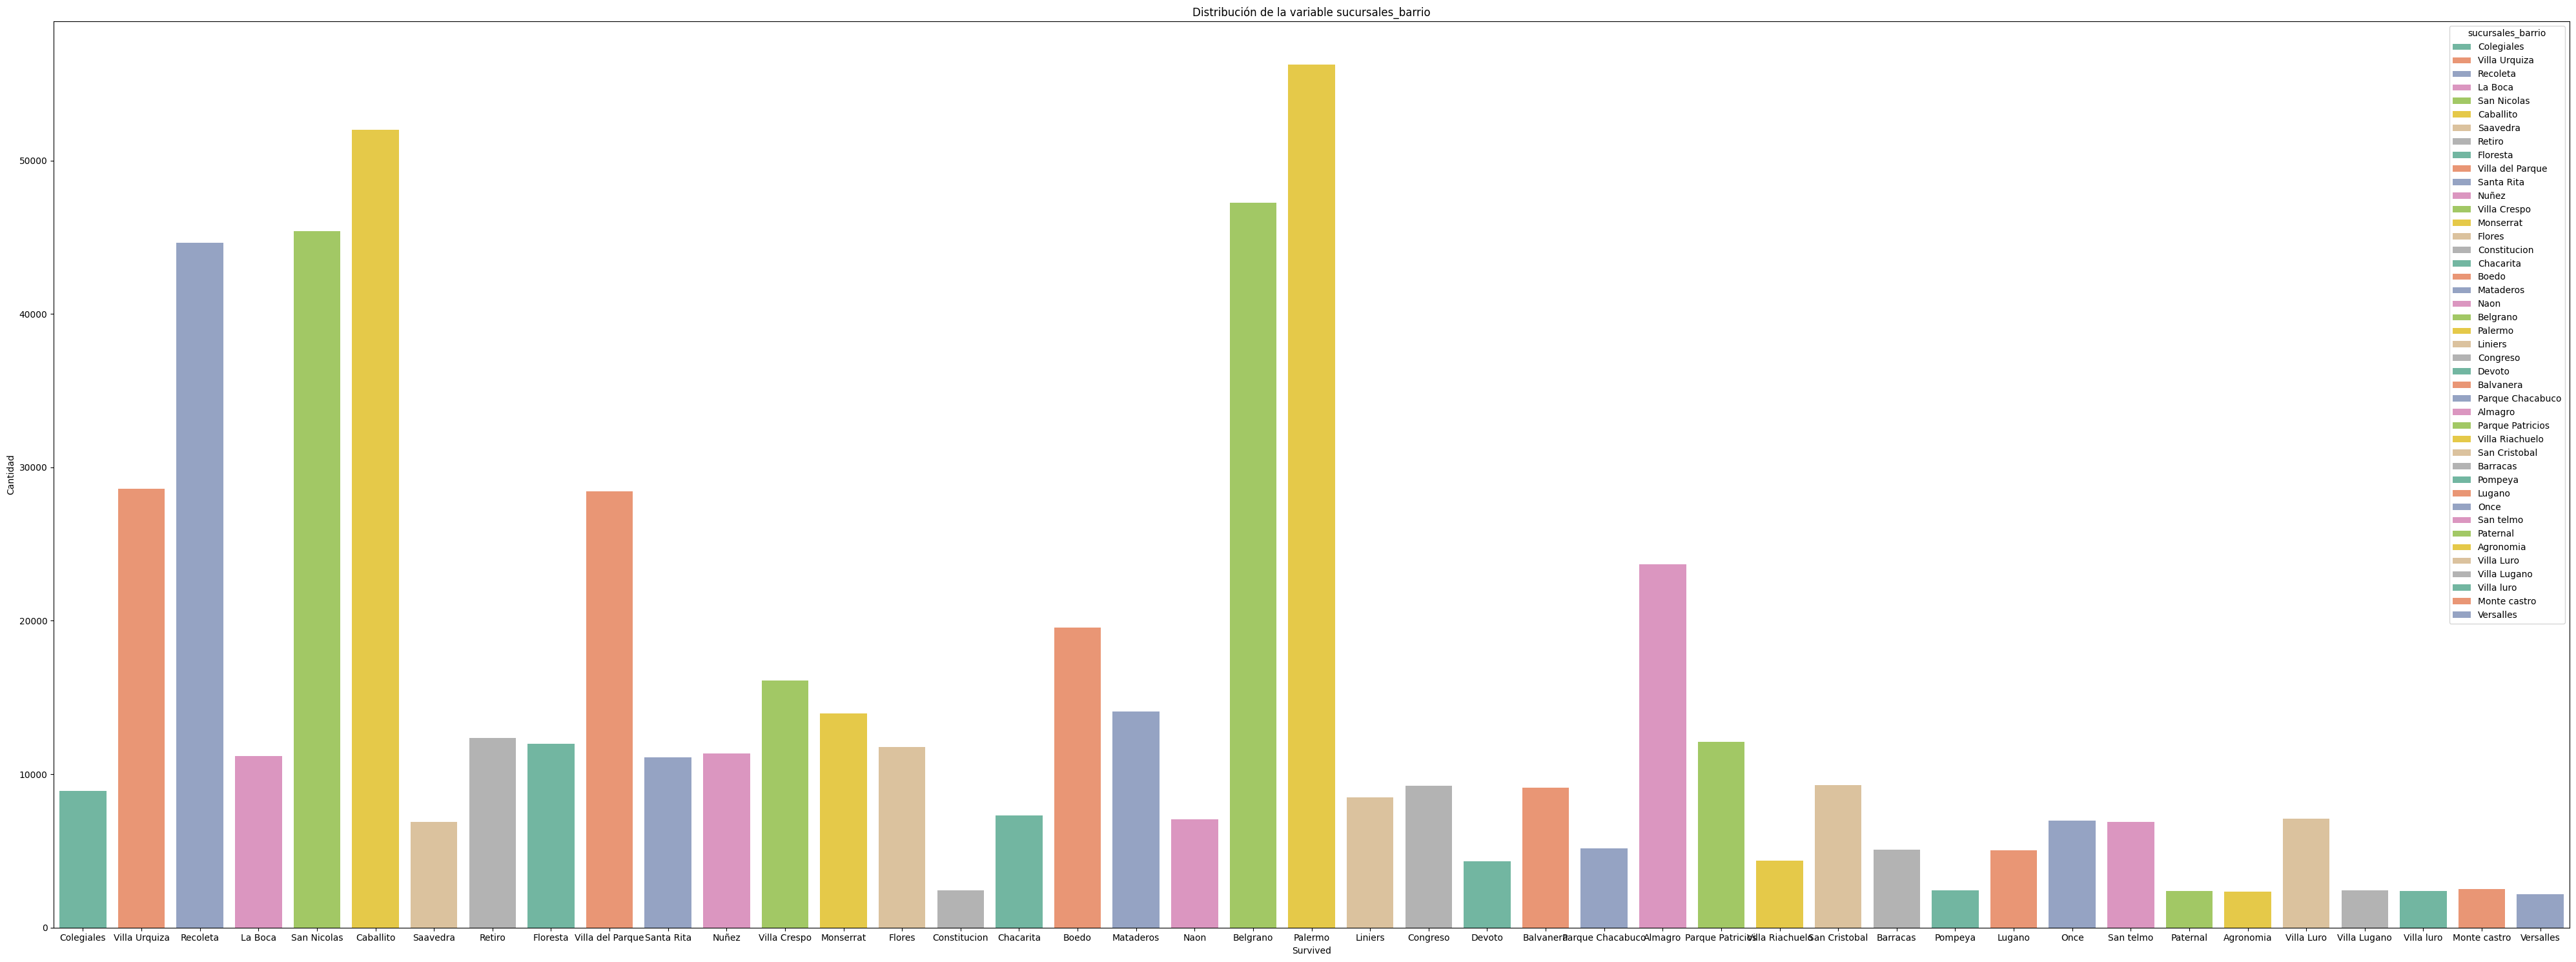

In [96]:
# Separo el dataset en X (variables) y (target)
target = 'sucursales_barrio'
X = productos_df_new.drop(columns=[target])
y = productos_df_new[target]
info(y)

In [86]:
productos_df_new["id_sucursal"].nunique()

327

In [87]:
# Contar el número de sucursales únicas por producto
productos_en_todas_sucursales = productos_df_new.groupby('id_producto')['id_sucursal'].nunique()

# Filtrar los productos que están en todas las sucursales, que en nuestro caso son 327
productos_en_todas_sucursales = productos_en_todas_sucursales[productos_en_todas_sucursales == 327].index

# Filtrar el DataFrame original
productos_df_en_varias_sucursales = productos_df_new[productos_df_new['id_producto'].isin(productos_en_todas_sucursales)]

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_53614/1472335093.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_en_todas_sucursales = productos_df_new.groupby('id_producto')['id_sucursal'].nunique()


In [90]:
productos_df_en_varias_sucursales['sucursales_barrio'].value_counts()

sucursales_barrio
Palermo             1950
Caballito           1716
Belgrano            1638
San Nicolas         1482
Recoleta            1482
Villa Urquiza       1014
Villa del Parque     936
Almagro              780
Boedo                624
Villa Crespo         546
Mataderos            468
Monserrat            468
Retiro               390
Flores               390
La Boca              390
Floresta             390
Nuñez                390
Santa Rita           390
Parque Patricios     390
San Cristobal        312
Colegiales           312
Congreso             312
Liniers              312
Balvanera            312
Saavedra             234
Villa Luro           234
San telmo            234
Naon                 234
Once                 234
Chacarita            234
Parque Chacabuco     156
Villa Riachuelo      156
Devoto               156
Lugano               156
Barracas             156
Villa Lugano          78
Constitucion          78
Paternal              78
Monte castro          78
Agronom

Para balancear los registros nos quedamos con los barrios que tienen más de 4 sucursales.

In [94]:
sucursales_por_barrio = productos_df_en_varias_sucursales.groupby('sucursales_barrio').agg({
    'id_sucursal': 'nunique'
})
productos_df_en_varias_sucursales = productos_df_en_varias_sucursales[productos_df_en_varias_sucursales['sucursales_barrio'].isin(sucursales_por_barrio[sucursales_por_barrio['id_sucursal'] > 4].index)]

productos_df_en_varias_sucursales.groupby('sucursales_barrio').agg({
    'id_sucursal': 'nunique'
}).head(10)

,id_sucursal
sucursales_barrio,
Almagro,10
Belgrano,21
Boedo,8
Caballito,22
Flores,5
Floresta,5
La Boca,5
Mataderos,6
Monserrat,6


Proporción de clases:
sucursales_barrio
Palermo             0.123153
Caballito           0.108374
Belgrano            0.103448
Recoleta            0.093596
San Nicolas         0.093596
Villa Urquiza       0.064039
Villa del Parque    0.059113
Almagro             0.049261
Boedo               0.039409
Villa Crespo        0.034483
Monserrat           0.029557
Mataderos           0.029557
Parque Patricios    0.024631
Santa Rita          0.024631
Nuñez               0.024631
Floresta            0.024631
La Boca             0.024631
Flores              0.024631
Retiro              0.024631
Name: proportion, dtype: float64

Entropía de Shannon: 3.9798833220074648


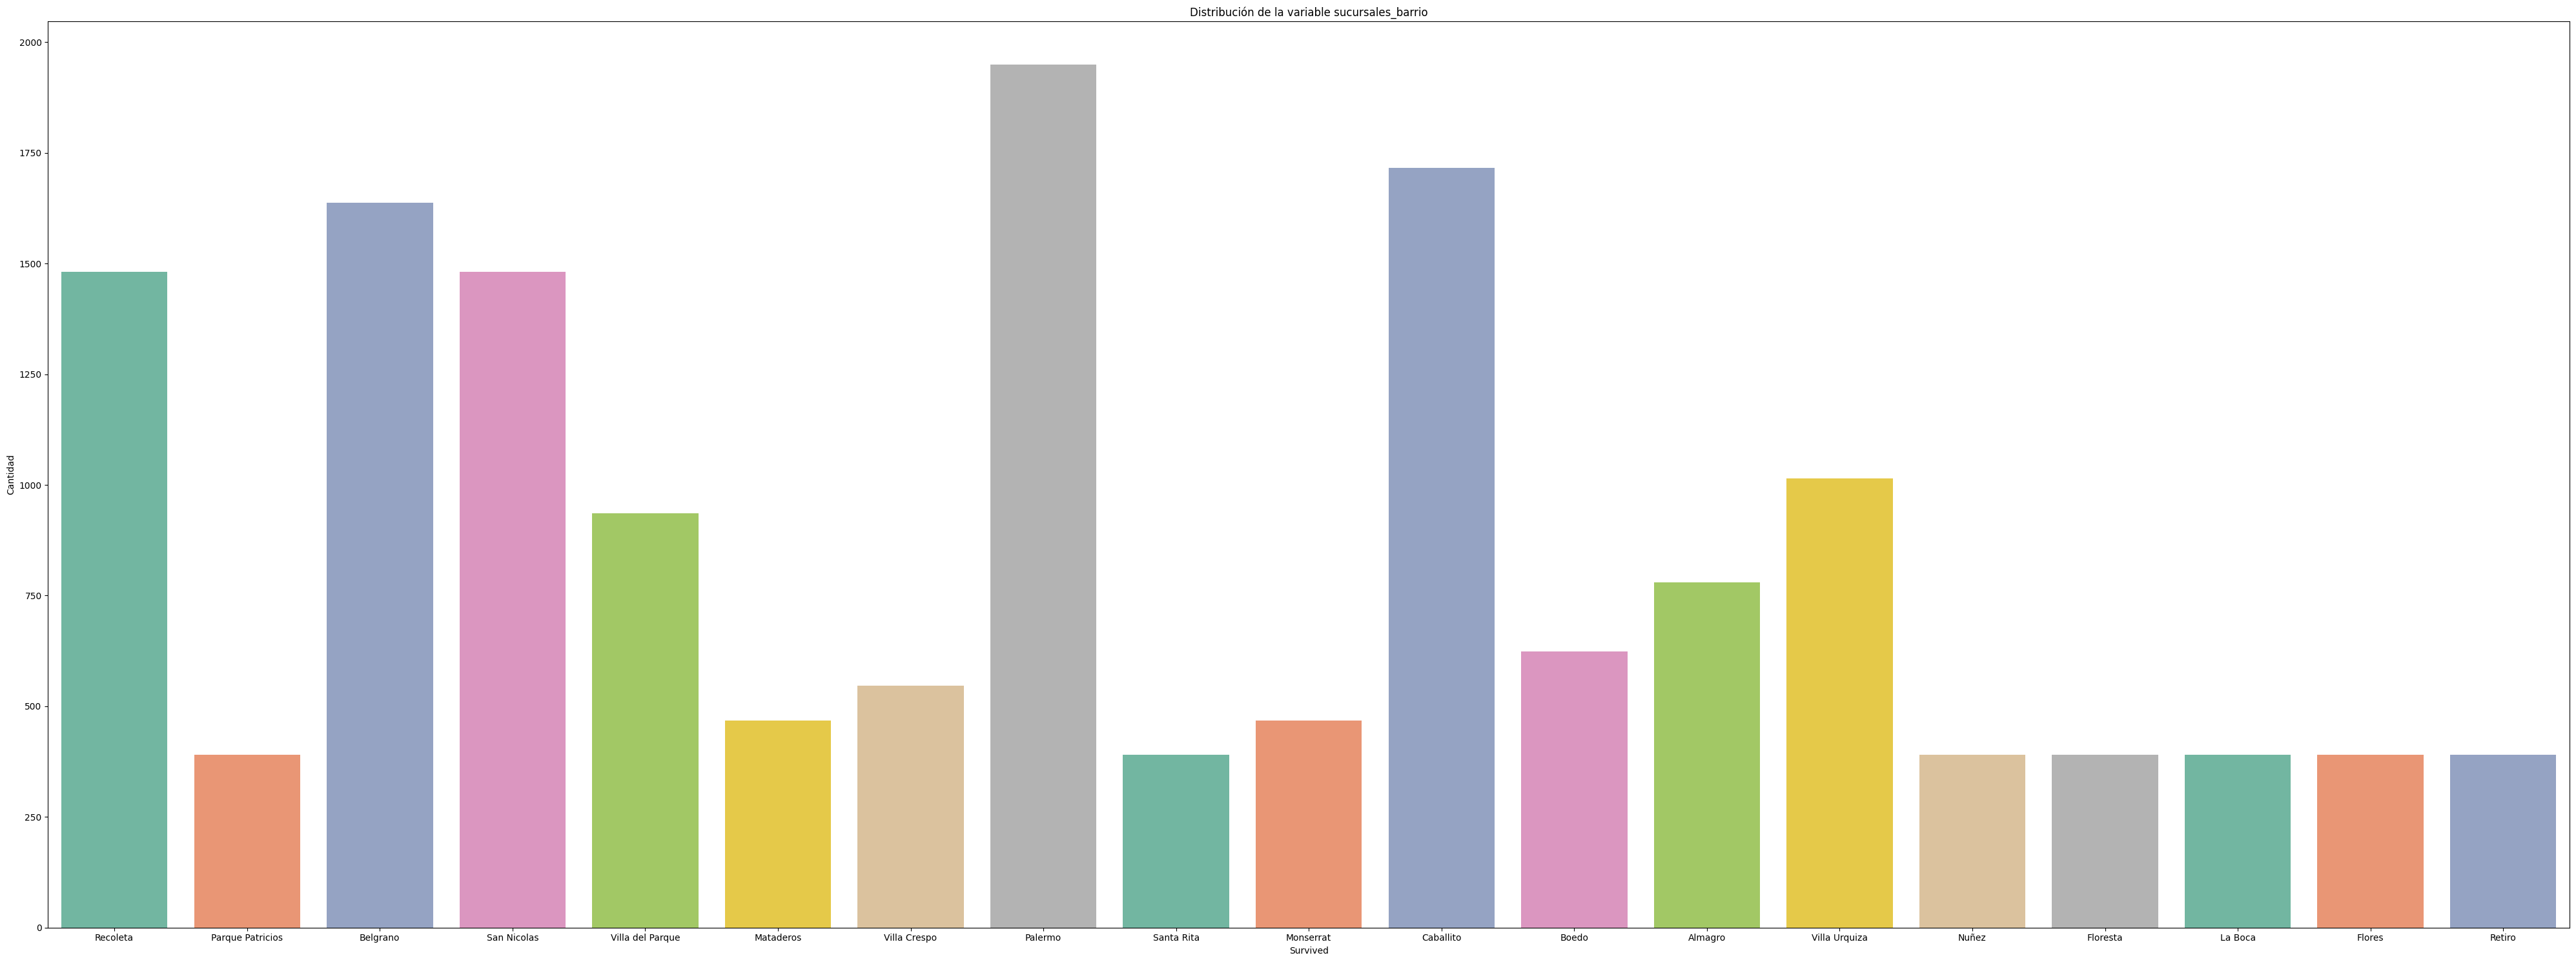

In [95]:
# Separo el dataset en X (variables) y (target)
target = 'sucursales_barrio'
X = productos_df_en_varias_sucursales.drop(columns=[target])
y = productos_df_en_varias_sucursales[target]
info(y)

# **Selección de features**

In [98]:
plt.figure(figsize=(25,6))

sns.heatmap(
    productos_df_en_varias_sucursales.corr(), 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm",  
    center=0, 
    vmin=-1, 
    vmax=1)
plt.ylabel('PEARSON')

plt.show()

ValueError: could not convert string to float: 'UNI'

<Figure size 2500x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(25,6))

sns.heatmap(
    productos_df_en_varias_sucursales.corr(method='spearman', numeric_only=False),
    annot=True, 
    fmt=".2f",  
    cmap="coolwarm",  
    center=0, 
    vmin=-1, 
    vmax=1,)
plt.ylabel('SPEARMAN')

plt.show()

In [ ]:
plt.figure(figsize=(25,6))

sns.heatmap(
    productos_df_en_varias_sucursales.corr(method='kendall', numeric_only=False), 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm",
    center=0, 
    vmin=-1, 
    vmax=1,)
plt.ylabel('KENDALL')

plt.show()